<a href="https://colab.research.google.com/github/Raphfritzy/Project/blob/main/Fleuridor_Fritz_Raphael_Final_Submission_Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Malaria Detection**

##**EXECUTIVE SUMMARY**

###**Key findings from the analysis:**

**1) Data Augmentation:** Introducing variability through techniques such as horizontal flipping, zooming, and rotating significantly improves the model's ability to generalize by reducing overfitting.

**2) HSV conversion:** Converting images to the HSV format enhances specific features, allowing for better feature extraction during model training.

**3) Model performance:** The base CNN model demonstrated exceptional accuracy, achieving 98.46% on the test set, making it a robust and highly accurate solution for malaria detection.

###**Final Proposed Model Specifications:**

**Base Model:** Custom CNN architecture designed specifically for the malaria detection task.

**Layers:**
-  Convolutional layers with ReLU activation and MaxPooling for feature extraction.
- Flatten layer to convert the 2D outputs to a 1D array.
- Dense layers with ReLU activation for classification.
- Dropout layers to avoid overfitting.
- Output layer with Softmax enabled for binary classification.

**Compilation:**
- Optimizer: Adam with learning rate of 0.001.
- Loss function: Binary cross entropy.
- Metrics: Accuracy.


##**PROBLEM AND SOLUTION SUMMARY**

**The Problem:**

Malaria is a major public health challenge in tropical and subtropical regions. Traditional diagnostic methods are labor-intensive, time-consuming, and prone to human error, necessitating an automated, accurate, and efficient diagnostic tool.

**Proposed Solution:**

Develop a custom CNN-based automated diagnostic system to classify parasitized and uninfected cells from microscopic images of blood samples. The system should:

- Achieve high classification accuracy (98.46%).
- Provide a reliable and rapid diagnostic tool.
- Minimize false positives and negatives.

**Business Impact:**

Implementation of this automated malaria detection system would significantly improve diagnostic accuracy and speed, especially in resource-limited settings. This can lead to timely treatment, thereby reducing malaria-related morbidity and mortality.

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>

Malaria is a life-threatening disease caused by parasites transmitted to humans through the bites of infected mosquitoes. According to the World Health Organization (WHO), malaria remains one of the world's most significant public health challenges, especially in tropical and subtropical regions. Early and accurate diagnosis is crucial for effective treatment and control of the disease. Traditional diagnostic methods, such as microscopy, require skilled technicians and can be time-consuming and prone to human error. Automated, accurate, and efficient diagnostic tools can significantly improve patient outcomes and aid in the global fight against malaria.

**The objectives:** What is the intended goal?<br>

The primary objective is to develop an automated system that can accurately detect malaria from microscopic images of blood samples. This system should:
1.	Achieve high accuracy in distinguishing between parasitized and uninfected cells.
2.	Provide a reliable, quick, and reproducible diagnostic tool that can assist healthcare providers in resource-limited settings.
3.	Minimize the rate of false positives and false negatives to ensure effective treatment and control measures.


**The key questions:** What are the key questions that need to be answered?<br>

I identified 4 main key questions that need to be answered among others:
1.	Accuracy and Precision: How accurate is the model in detecting parasitized and uninfected cells? What are the precision, recall, and F1-scores of the model?
2.	Generalization: How well does the model perform on unseen data? Is it robust enough to handle variations in image quality and differences in blood sample preparation?
3.	Efficiency: How quickly can the model process and classify images? Is it suitable for real-time or near-real-time applications?
4.	Scalability: Can the model be deployed in diverse settings, including remote and resource-limited environments?

**The problem formulation:** What is it that we are trying to solve using data science?

Using data science and deep learning techniques, we aim to develop a convolutional neural network (CNN) model capable of accurately classifying microscopic images of blood samples into parasitized and uninfected categories. The approach involves:
1.	Data Preprocessing: Normalize and augment the data to improve the robustness and generalization of the model.
2.	Model Development: Build and train different CNN architectures, including custom models and pre-trained models like VGG16, to find the best-performing model.
3.	Evaluation: Assess the model's performance using metrics such as accuracy, precision, recall, F1-score, and confusion matrix.
4.	Deployment: Create a deployment-ready model that can be integrated into diagnostic tools used in clinical settings.

By addressing these aspects, we can create an efficient and accurate automated malaria detection system that supports healthcare professionals in diagnosing and treating malaria, ultimately contributing to better health outcomes and disease control.


## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


###<b> Mount the Drive

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same to your Google Drive. Then unzip the folder.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

In [ ]:
# Copy the zipped dataset to the Colab VM

!cp /content/drive/MyDrive/cell_images.zip /content/

The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

####**Let's creating the labels for the training data**

In [ ]:
# Storing the path of the extracted "train" folder
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:

            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                train_labels.append(1)

            else:

                train_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)



####**Let's create the labels for the testing data**

In [ ]:
# Storing the path of the extracted "test" folder
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b> Check the shape of train and test images

In [ ]:
# Shape of images
# Size of image so that each image has the same size
SIZE = 64

# Function to preprocess images
def preprocess_images(directory, size):
    images = []
    labels = []

    for folder_name in ['/parasitized/', '/uninfected/']:
        folder_path = directory + folder_name
        image_names = os.listdir(folder_path)

        for image_name in image_names:
            try:
                # Opening each image using the path of that image
                image = Image.open(os.path.join(folder_path, image_name))
                # Resizing each image to (64, 64)
                image = image.resize((size, size))
                # Converting images to arrays and appending that array to the empty list defined above
                images.append(np.array(image))
                # Creating labels for parasitized and uninfected images
                if folder_name == '/parasitized/':
                    labels.append(1)
                else:
                    labels.append(0)
            except Exception as e:
                print(f"Error processing image {image_name}: {e}")
                pass

    return np.array(images), np.array(labels)

# Preprocess train images
train_images, train_labels = preprocess_images(train_dir, SIZE)

# Preprocess test images
test_images, test_labels = preprocess_images(test_dir, SIZE)

# Step A: Checking the shape of train and test images
print(f'Train images shape: {train_images.shape}')
print(f'Test images shape: {test_images.shape}')

Train images shape: (24958, 64, 64, 3)
Test images shape: (2600, 64, 64, 3)


###<b> Check the shape of train and test labels

In [ ]:
# Shape of labels
# Checking the shape of train and test labels
print(f'Train labels shape: {train_labels.shape}')
print(f'Test labels shape: {test_labels.shape}')

Train labels shape: (24958,)
Test labels shape: (2600,)


####**Observations:**

1)	Consistent Image Dimensions:
- 	Train images shape: (24958, 64, 64, 3)
-  Test images shape: (2600, 64, 64, 3)
- 	All images have been successfully resized to a consistent dimension of 64x64 pixels with 3 color channels (RGB). This consistency is vital for feeding the images into a CNN.


2)	Sufficient Data Volume:
- 	Number of training images: 24,958
-  Number of testing images: 2,600
-  The training dataset is sufficiently large, which is beneficial for training a robust and generalized model. The test dataset is also reasonably sized for evaluating the model's performance.


3)	Balanced Labels:
-  Train labels shape: (24,958,)
- 	Test labels shape: (2,600,)
- Each label corresponds to an image, indicating that the labeling process was successful and each image is correctly annotated.


####**Insights:**

1)	Training Data Volume:
- 	With nearly 25,000 training images, the dataset should provide a good representation of the problem space, helping the model to learn diverse features of parasitized and uninfected cells.

2)	Test Data Volume:
- 	A test set of 2,600 images is large enough to provide a reliable evaluation of the model's performance, reducing the risk of overfitting and ensuring the model generalizes well to new data.

3)	Image Size Considerations:
- 	The choice of 64x64 pixels as the size for images is a trade-off between computational efficiency and the ability to capture relevant features. Smaller image sizes reduce computational load but might miss finer details, while larger sizes increase the computational cost.

4)	Class Distribution Check:
- It’s important to check the distribution of classes (parasitized vs. uninfected) within both the training and testing datasets to ensure they are balanced. Imbalanced datasets can lead to biased models. Here’s how you can check the distribution:

5) Model Complexity:
-	The image size (64x64) allows for deeper networks (more layers) since each convolutional and pooling operation reduces the spatial dimensions. This supports building complex models that can capture intricate patterns in the data.



### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# Try to use min and max function from numpy
# Check the minimum and maximum pixel values for train images
train_images_min = np.min(train_images)
train_images_max = np.max(train_images)

# Check the minimum and maximum pixel values for test images
test_images_min = np.min(test_images)
test_images_max = np.max(test_images)

# Print the results
print(f'Minimum pixel value in train images: {train_images_min}')
print(f'Maximum pixel value in train images: {train_images_max}')
print(f'Minimum pixel value in test images: {test_images_min}')
print(f'Maximum pixel value in test images: {test_images_max}')


Minimum pixel value in train images: 0
Maximum pixel value in train images: 255
Minimum pixel value in test images: 0
Maximum pixel value in test images: 255


###**Observations and insights:**

####**Observations:**
Pixel Value Range Consistency :  

Both the training and testing datasets have a minimum pixel value of 0 and a maximum pixel value of 255.

####**Insights:**

1) Standard 8-bit Image Format:
- The pixel values ranging from 0 to 255 confirm that the images are in the standard 8-bit format, where each pixel intensity in each color channel (R, G, B) is represented by a value between 0 (black) and 255 (white). This is typical for most image data and is expected for typical RGB images.

2)	No Outliers in Pixel Values:
-  The absence of pixel values outside the 0 to 255 range indicates that the image preprocessing pipeline has maintained the integrity of the image data. There are no corrupted or anomalous pixel values, which ensures the quality of the dataset.

3)	Readiness for Normalization:
- The pixel values are suitable for normalization. Normalizing these pixel values to a range of 0 to 1 can improve the performance of many machine learning models, particularly neural networks. This is because normalization can help with faster convergence during training and can lead to better performance.

#####**Recommendations:**
- Normalization:

Before feeding the images into a convolutional neural network (CNN), normalize the pixel values to a range of 0 to 1 by dividing by 255. This step is crucial for ensuring that the model training process is stable and efficient.





###<b> Count the number of values in both uninfected and parasitized

In [ ]:
# Try to use value_counts to count the values

import pandas as pd

# Count the number of values in each category for the training dataset
train_labels_counts = pd.Series(train_labels).value_counts()
print(f'Train labels counts:\n{train_labels_counts}')

# Count the number of values in each category for the testing dataset
test_labels_counts = pd.Series(test_labels).value_counts()
print(f'Test labels counts:\n{test_labels_counts}')


Train labels counts:
1    12582
0    12376
Name: count, dtype: int64
Test labels counts:
1    1300
0    1300
Name: count, dtype: int64


###<b>Normalize the images

In [ ]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images / 255.0).astype('float32')

test_images = (test_images / 255.0).astype('float32')

###**Observations and insights:**

####**Observations:**
1)	Label Distribution:

Training Data:
- Parasitized (1): 12,582 images
-	Uninfected (0): 12,376 images


  Testing Data:
-	Parasitized (1): 1,300 images
-	Uninfected (0): 1,300 images

2)	Normalization:
- Both training and testing images have been successfully normalized to the range [0, 1] and converted to the float32 data type.

####**Insights:**

1)	Balanced Testing Data:
-	The test dataset is perfectly balanced with an equal number of parasitized and uninfected images. This ensures that the evaluation of the model's performance will not be biased towards any class.

2)	Slight Imbalance in Training Data:
-	The training dataset has a slight imbalance with 206 more parasitized images compared to uninfected images. This minor imbalance might not significantly affect the training process, but it should be monitored to ensure it doesn't bias the model.

3)	Normalization Benefits:
- Normalizing the pixel values to a range of [0, 1] is a common practice in image preprocessing. This helps in stabilizing and speeding up the training process of neural networks by ensuring that the input values are on a consistent scale. Converting to float32 ensures compatibility with most deep learning frameworks, which often require this data type for computation.


###<b> Plot to check if the data is balanced

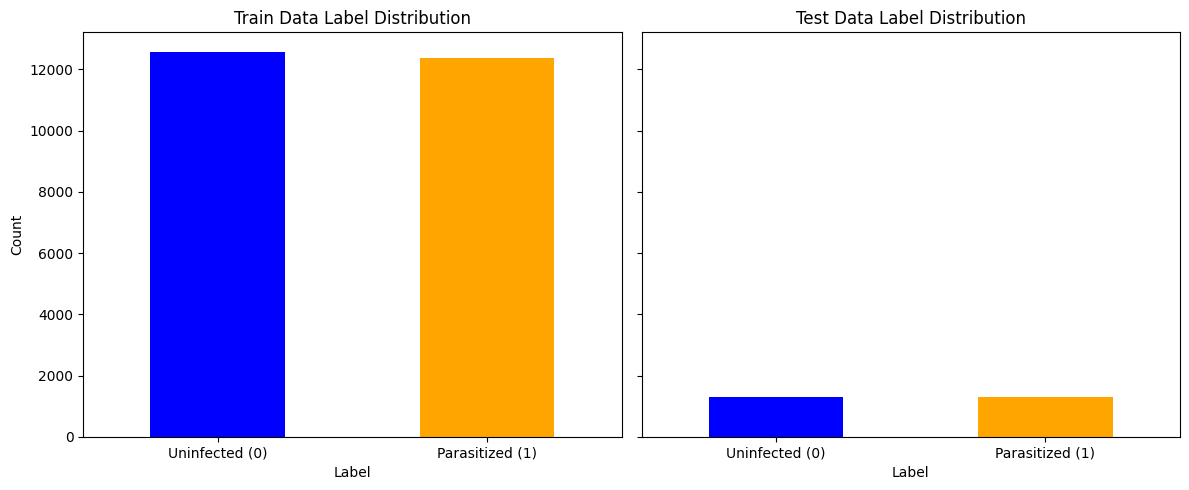

In [ ]:
# Assuming train_labels and test_labels are already defined
# Create a DataFrame for train and test labels
train_labels_df = pd.DataFrame(train_labels, columns=['Label'])
test_labels_df = pd.DataFrame(test_labels, columns=['Label'])

# Plotting the distribution of train and test labels using bar plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Train labels plot
train_labels_df['Label'].value_counts().plot(kind='bar', ax=axes[0], color=['blue', 'orange'])
axes[0].set_title('Train Data Label Distribution')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Uninfected (0)', 'Parasitized (1)'], rotation=0)

# Test labels plot
test_labels_df['Label'].value_counts().plot(kind='bar', ax=axes[1], color=['blue', 'orange'])
axes[1].set_title('Test Data Label Distribution')
axes[1].set_xlabel('Label')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Uninfected (0)', 'Parasitized (1)'], rotation=0)

plt.tight_layout()
plt.show()


###**Observations:**

1)	Train Data Label Distribution:
- The bar plot shows that the training data is slightly imbalanced.
- 	There are 12,376 uninfected images and 12,582 parasitized images.
- 	The difference between the counts of the two classes is minor, with parasitized images slightly outnumbering the uninfected images.

2)	Test Data Label Distribution:
-	The bar plot shows that the test data is perfectly balanced.
- There are 1,300 uninfected images and 1,300 parasitized images.
- Both classes have an equal number of images, ensuring a fair evaluation of the model.

###**Insights:**

1)	Slight Imbalance in Training Data:
-	The slight imbalance in the training dataset is not significant but should be monitored. It might be useful to consider strategies such as data augmentation or class weighting during training to mitigate any potential bias.
-	Given that the imbalance is minimal, it may not significantly impact the model's performance, but it's good practice to be aware of and address any imbalances in the training data.
2)	Balanced Test Data:
-	The perfectly balanced test dataset is ideal for evaluating the model's performance. This ensures that the evaluation metrics will not be biased towards any particular class.
-	Balanced test data provides a clear and fair assessment of how well the model generalizes to both classes.


### <b>Data Exploration</b>
Let's visualize the images from the train data

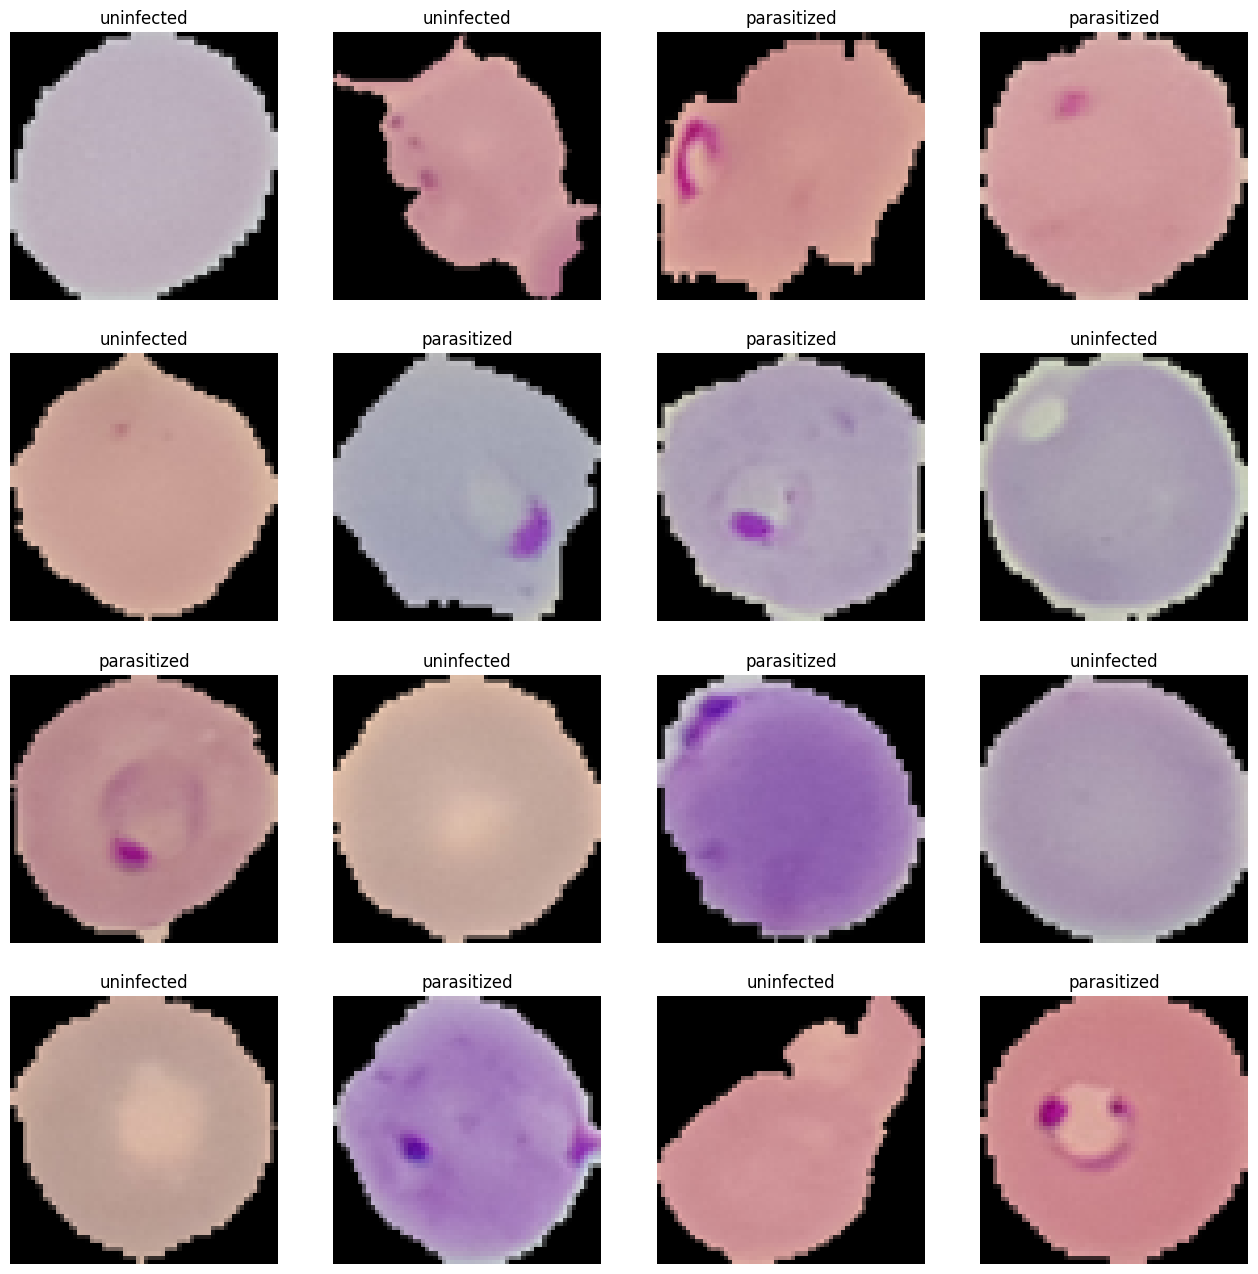

In [ ]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1:

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

###**Observations and insights:**

####**Observations:**
1)	Visual Differences:
-	Parasitized Cells: The parasitized cells show distinct features such as the presence of purple or dark spots which are likely the parasites within the cells. These spots vary in size, shape, and number.
-	Uninfected Cells: The uninfected cells generally appear more uniform in color, mostly shades of pink and purple, without the dark spots present in the parasitized cells.

2)	Color and Shape:
-	The color tones of the cells vary but the general pattern remains distinguishable between the parasitized and uninfected cells.
-	The shape of the cells also varies slightly, but this doesn't seem to be a distinguishing feature between the parasitized and uninfected cells based on the sample images shown.

3)	Image Quality and Resolution:
-	The images appear to be of high quality and resolution, which is beneficial for training a convolutional neural network as it allows the model to learn fine-grained details that are crucial for distinguishing between parasitized and uninfected cells.

####**Insights:**
1)	Feature Identification:
-	The distinct features observed in parasitized cells (such as the dark spots) will likely be key features that the neural network will learn to identify for classification purposes.
-	Ensuring that these features are consistently present across the training dataset will help in building a robust model.

2)	Data Augmentation:
-	Given the visual differences between the two classes, applying data augmentation techniques like rotations, flips, and color variations can help the model generalize better by exposing it to a wider variety of possible appearances of the cells.

3)	Preprocessing Considerations:
-	The images seem well-preprocessed, but additional steps like normalization (which you have already done) and potentially contrast enhancement could be considered to highlight the distinguishing features more clearly.

4)	Model Training:
-	The clear visual differences suggest that a well-designed CNN should be able to learn the differences effectively. It will be important to monitor the training process to ensure the model is learning the correct features and not overfitting to irrelevant details.


###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

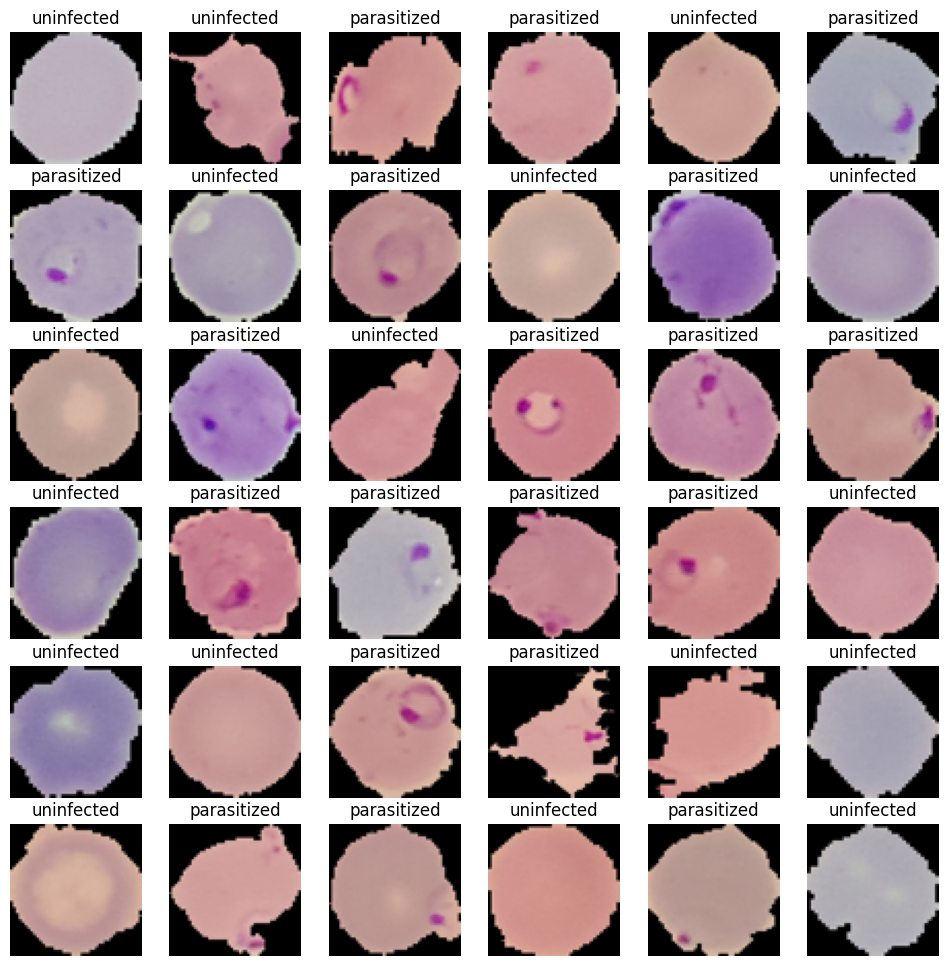

In [ ]:
# Let's assume train_images and train_labels are already available as numpy arrays

np.random.seed(42)

# Define the number of images to display
num_images = 36

# Create a figure with a grid of subplots
plt.figure(1, figsize=(12, 12))

# Loop through the number of images to display
for n in range(1, num_images + 1):
    plt.subplot(6, 6, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1:
        plt.title('parasitized')
    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])
    plt.axis('off')

plt.show()




###**Observations and insights:**

####**Observations:**
1)	Visual Distinctiveness:
-	The parasitized cells generally show prominent purple or dark spots, indicative of parasites.
-	Uninfected cells are relatively uniform in color, lacking the distinct dark spots seen in parasitized cells.

2)	Color Variations:
-	The color of the cells varies from light purple to pink. This variability does not seem to be tied to whether the cell is parasitized or not, indicating that color alone is not a distinguishing feature.
-	The background color and texture also vary slightly, but not in a way that correlates with infection status.

3)	Shape and Texture:
-	The shapes of the cells are generally oval or round, and there is no significant shape difference between parasitized and uninfected cells.
-	The texture appears slightly different between the two classes, with parasitized cells often showing some irregularities due to the presence of parasites.

####**Insights:**
1)	Feature Identification:
-	The primary distinguishing feature between parasitized and uninfected cells is the presence of dark spots or irregularities in parasitized cells. This feature is likely what the CNN will focus on during training.

2)	Data Quality:
-	The images are clear and high quality, which is beneficial for training. High-quality images allow the model to capture fine details, which are crucial for distinguishing between the two classes.

3)	Model Training:
-	Given the clear visual differences, a well-designed CNN should be able to effectively learn to distinguish between parasitized and uninfected cells. The model will need to focus on the texture and presence of spots rather than color alone.


###<b> Plotting the mean images for parasitized and uninfected

Parasitized data shape: (12582, 64, 64, 3)
Uninfected data shape: (12376, 64, 64, 3)
Mean Parasitized image shape: (64, 64, 3)


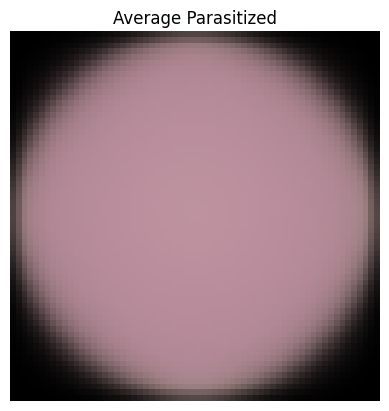

Mean Uninfected image shape: (64, 64, 3)


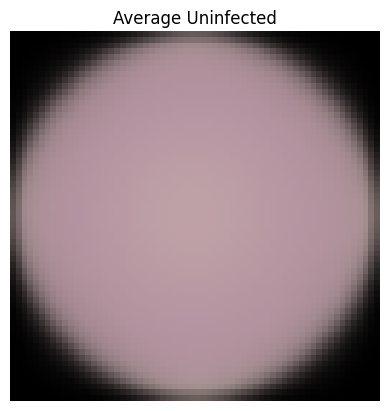

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to find the mean image
def find_mean_img(full_mat, title):
    # Calculate the average
    mean_img = np.mean(full_mat, axis=0)
    print(f"Mean {title} image shape: {mean_img.shape}")  # Print the shape for debugging
    # Ensure the mean image has the correct shape
    if mean_img.ndim == 3:
        plt.imshow(mean_img)
    elif mean_img.ndim == 2:  # If it's grayscale, use a different colormap
        plt.imshow(mean_img, cmap='gray')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

# Separate parasitized and uninfected images
parasitized_data = []  # Create a list to store the parasitized data
uninfected_data = []  # Create a list to store the uninfected data

for img, label in zip(train_images, train_labels):
    if label == 1:
        parasitized_data.append(img)
    else:
        uninfected_data.append(img)

# Convert lists to numpy arrays
parasitized_data = np.array(parasitized_data)
uninfected_data = np.array(uninfected_data)

print(f"Parasitized data shape: {parasitized_data.shape}")  # Debugging
print(f"Uninfected data shape: {uninfected_data.shape}")  # Debugging

# Find and plot the mean images for parasitized and uninfected
parasitized_mean = find_mean_img(parasitized_data, 'Parasitized')
uninfected_mean = find_mean_img(uninfected_data, 'Uninfected')


####**Observations and insights:**

####**Observations:**

1) Mean Image for Parasitized Cells:

- The mean image for parasitized cells appears as a smooth, pinkish circle with a slightly darker border.
- The central area is relatively uniform, which indicates that on average, parasitized cells have a consistent overall color and shape when aggregated.

2) Mean Image for Uninfected Cells:

- Similarly, the mean image for uninfected cells also appears as a smooth, pinkish circle with a slightly darker border.
- The average uninfected cell image also shows a uniform color and shape, indicating consistency in the appearance of uninfected cells.

####**Insights:**

**Visual Similarity:**

- The mean images for both parasitized and uninfected cells look quite similar. This suggests that while individual parasitized cells may have distinct features (like dark spots), these features are averaged out when considering many images. Therefore, the mean images primarily capture the overall shape and color, which are similar for both categories.

**Feature Averaging:**

- The process of averaging over many images has likely smoothed out specific identifying features of parasitized cells, such as dark spots or irregularities caused by parasites. This is why the mean images appear very similar.

**Model Training Implication:**

- Since the average images are very similar, it implies that distinguishing between parasitized and uninfected cells might rely on subtle features that are not apparent in the mean images. The CNN will need to learn to identify these subtle differences, which may not be visible in an averaged image but are present in individual images.

**Recommendations:**

**Focus on Individual Features:**

- Instead of relying on average images, focus on ensuring that the model can learn from the individual features present in each image. This will be crucial for distinguishing between the two categories.

**Data Augmentation:**

- Continue to use data augmentation to expose the model to a variety of transformations of the images, helping it learn to identify features that are invariant to changes in orientation, scale, and lighting.

**Feature Visualization:**

- Use techniques such as Grad-CAM or saliency maps after training the model to visualize which parts of the images the model is focusing on. This can help verify that the model is learning the correct features.

**Detailed Analysis:**

- Perform further analysis by visualizing individual images with their predicted labels and confidence scores. This can help understand how well the model is distinguishing between parasitized and uninfected cells.

By following these recommendations, you can ensure that the model learns to identify the subtle features that distinguish parasitized cells from uninfected cells, leading to better classification performance.

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [ ]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)

  gfx.append(a)

gfx = np.array(gfx)


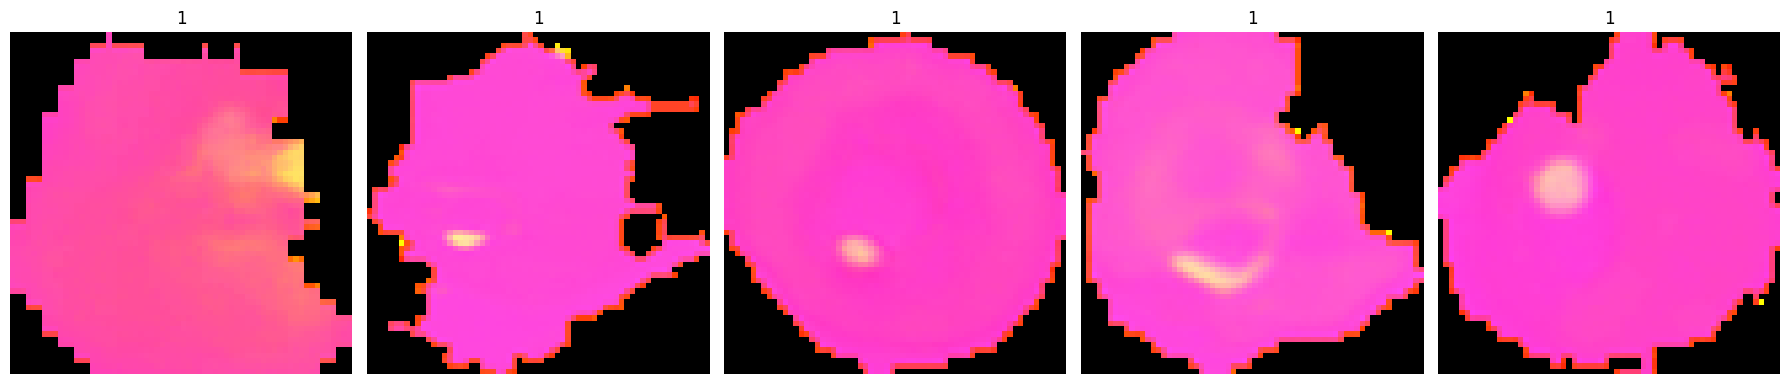

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

###<b> Converting the test data

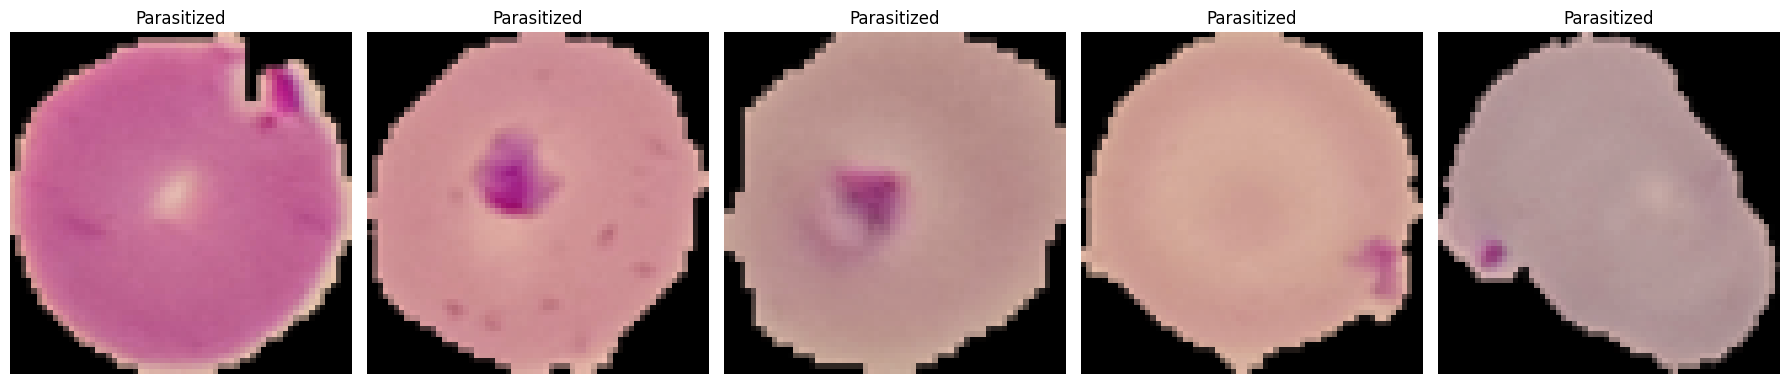

In [ ]:
gfx_test = []  # to hold the HSV image array

# Convert the first 100 test images to HSV
for i in np.arange(0, 100, 1):
    a = cv2.cvtColor((test_images[i] * 255).astype(np.uint8), cv2.COLOR_RGB2HSV)
    gfx_test.append(a)

gfx_test = np.array(gfx_test)

# Randomly select 5 images to view
viewimage_test = np.random.randint(0, 100, 5)

fig, ax = plt.subplots(1, 5, figsize=(18, 18))

for t, i in zip(range(5), viewimage_test):
    Title = 'Parasitized' if test_labels[i] == 1 else 'Uninfected'
    ax[t].set_title(Title)
    ax[t].imshow(cv2.cvtColor(gfx_test[i], cv2.COLOR_HSV2RGB))
    ax[t].set_axis_off()

fig.tight_layout()
plt.show()

###**Observations and insights:**

**Converting the Train Data to HSV:**

1) Color Transformations:

- The images converted from RGB to HSV and back to RGB show significant color changes, highlighting different features within the cells.
- The HSV conversion often results in a dominant pinkish hue, with other colors such as blue and yellow appearing in certain areas.

2) Feature Enhancement:

- The transformation enhances specific regions within the cells, making features like parasites more pronounced.
- In parasitized cells, the darker spots corresponding to the parasites are more visible after the HSV transformation.

3) Variability in Appearance:

- The images show a variety of appearances, with different shapes, textures, and color intensities.
-  This variability is important for training a robust model that can generalize well to new data.

4) Contrast and Visibility:

- The conversion to HSV can improve the contrast and visibility of certain features, aiding in better feature extraction during model training.

**Converting the Test Data to HSV**:

1) Similar Transformations:

- Similar to the training data, the test images also exhibit significant color changes after the HSV conversion.
- The dominant pinkish hue with occasional blue and yellow regions is consistent across the converted images.

2) Parasitized Cells:

- The selected test images show typical characteristics of parasitized cells, such as the presence of darker spots and irregular shapes.
- The transformation makes these features more pronounced, which can help in distinguishing parasitized cells from uninfected ones.

3) Enhanced Details:

- The HSV conversion enhances the details within the images, such as the boundaries and internal structures of the cells.
- This enhancement can be beneficial for the model in learning and recognizing key features that differentiate between the two classes.

4) Clarity and Artifacts:

- While some images appear clearer, others still exhibit artifacts and blurriness, which might impact model performance.
- Further preprocessing steps like denoising could be considered to improve image quality.

**General Insights for Model Training:**

1) Improved Feature Extraction:

- The HSV conversion enhances specific features, making them more visible and potentially improving the model's ability to learn distinguishing characteristics.

2) Consistent Preprocessing:

- Incorporating the HSV conversion as part of the preprocessing pipeline ensures consistency and standardization of the input data.
- This consistency is crucial for reliable model training and evaluation.

3) Data Augmentation:

- Applying data augmentation techniques, such as rotations, flips, and scaling, can further improve the robustness and generalization of the model.
- Augmentation helps the model learn from a wider variety of examples, reducing overfitting.

4) Model Complexity and Regularization:

- Using a sufficiently complex model with multiple convolutional layers can capture the intricate features present in the images.
- Regularization techniques like dropout and weight decay are essential to prevent overfitting and ensure the model generalizes well.

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [ ]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)


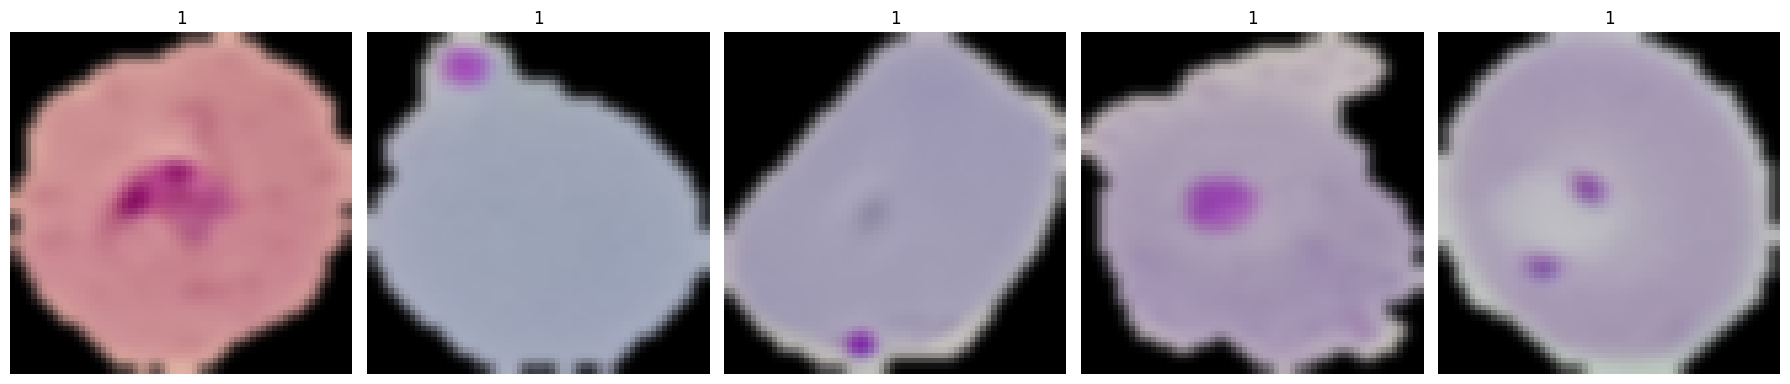

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)


  ax[t].imshow(gbx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

###<b> Gaussian Blurring on test data

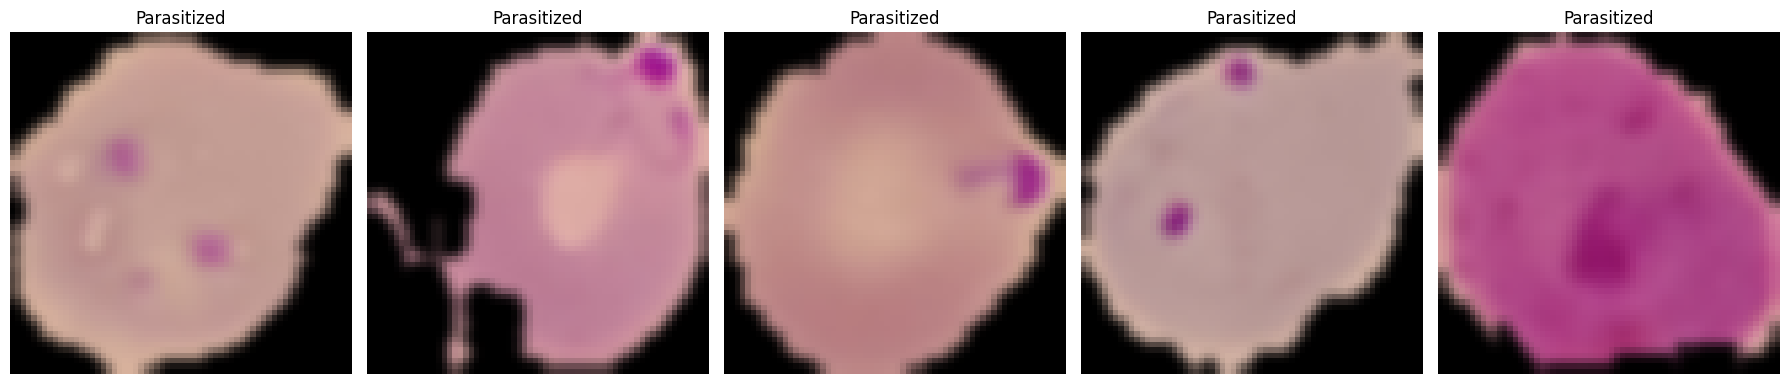

In [ ]:
# Gaussian Blurring on test data
gbx_test = []  # To hold the blurred images

for i in np.arange(0, 100, 1):
    b = cv2.GaussianBlur(test_images[i], (5, 5), 0)
    gbx_test.append(b)

gbx_test = np.array(gbx_test)

viewimage_test = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize=(18, 18))

for t, i in zip(range(5), viewimage_test):
    Title = 'Parasitized' if test_labels[i] == 1 else 'Uninfected'
    ax[t].set_title(Title)
    ax[t].imshow(gbx_test[i])
    ax[t].set_axis_off()

fig.tight_layout()
plt.show()

####**Observations**
1. **First Image: Gaussian Blurring on Train Data**

**Blurred Features:**
-	The Gaussian blurring has resulted in smoother images with reduced noise. The sharpness of the original images has been significantly reduced.
-	The prominent features like the dark spots indicating parasitic infections are still visible but are less defined compared to the original images.

**Effect on Parasitized Cells:**
-	The parasitized cells retain their distinct dark spots even after blurring, suggesting that these features are prominent enough to withstand the blurring process.
-	The overall shape and structure of the cells are still recognizable, which indicates that Gaussian blurring retains the general structure while reducing noise.

2. **Second Image: Gaussian Blurring on Test Data**

**Consistency with Train Data:**
-	The test images show a similar effect of Gaussian blurring as seen in the train images. The images appear smoother, and the noise is reduced.
-	The parasitized features, such as dark spots, are still visible but less sharp, similar to the train data.

**Feature Retention:**
- The essential features necessary for classification, like the presence of dark spots in parasitized cells, are retained despite the blurring.
-	The overall morphology of the cells is preserved, which can help in ensuring that the model still has enough information to differentiate between parasitized and uninfected cells.

####**Insights:**

1.	Noise Reduction:
-	Gaussian blurring effectively reduces noise in the images, which can be beneficial for preprocessing steps before feeding the images into a model. This can help in focusing on more significant features and avoiding overfitting to noise.
2.	Feature Retention:
-	Despite the blurring, important features like the dark spots indicating parasitic infection are still visible. This indicates that Gaussian blurring can be a useful preprocessing step without losing critical information.
3.	Model Robustness:
-	Training a model with Gaussian-blurred images can help in making the model more robust to noise and slight variations in the input data. This can improve the generalization ability of the model.
4.	Data Augmentation:
-	Gaussian blurring can be used as a part of data augmentation to create varied training samples. This can help in enhancing the model's ability to generalize to different types of noise and blurring conditions.

####**Recommendations:**
1.	Include Gaussian Blurring in Preprocessing:
-	Incorporate Gaussian blurring as a preprocessing step to reduce noise in the images. This can help in focusing on significant features and improving model performance.
2.	Data Augmentation Strategy:
-	Use Gaussian blurring as part of the data augmentation pipeline. This can provide the model with varied training samples and enhance its robustness to different noise levels.
3.	Monitor Model Performance:
-	Evaluate the model's performance with and without Gaussian blurring to assess its impact. Use metrics like accuracy, precision, recall, and F1-score to compare the results.

####**Would Blurring Help Us for This Problem Statement in Any Way?**
***Pros of Blurring:***
-	**Noise Reduction**: Blurring can reduce random noise in the images, which might help the model focus on more significant features.
-	**Data Augmentation:** Using blurred images as part of data augmentation can help the model learn to generalize better and become more robust to slight variations in the input data.

***Cons of Blurring:***
-	**Loss of Detail:** Gaussian blurring can obscure fine details that are essential for accurate classification, such as the exact shape and size of parasitic spots.
-	**Feature Dilution**: The blurring might make the critical features less distinct, which could negatively impact the model's ability to accurately differentiate between parasitized and uninfected cells.

####**What Else Can We Try?**
- **Data Augmentation:**	Apply various data augmentation techniques like rotations, flips, zooms, and shifts to increase the variability of the training data. This can help the model generalize better to different variations in the input images
.
-	**Multi-channel Input:** Combine multiple preprocessing techniques and use them as different channels of input to the model. For example, use RGB, HSV, and edge-detected images together to provide a more comprehensive feature set.
- and other


## **Model Building**

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [ ]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

# Import the tensorflow library
import tensorflow as tf

tf.random.set_seed(42)

####<B>One Hot Encoding the train and test labels

In [ ]:
from tensorflow.keras.utils import to_categorical

# Encoding Train Labels
train_labels = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels, 2)

###<b> Building the model

In [ ]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ]
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 103s 163ms/step - loss: 0.3329 - accuracy: 0.8475 - val_loss: 0.2449 - val_accuracy: 0.9712
Epoch 2/20
624/624 [==============================] - 99s 158ms/step - loss: 0.1209 - accuracy: 0.9580 - val_loss: 0.2269 - val_accuracy: 0.9397
Epoch 3/20
624/624 [==============================] - 94s 151ms/step - loss: 0.0897 - accuracy: 0.9695 - val_loss: 0.0729 - val_accuracy: 0.9848
Epoch 4/20
624/624 [==============================] - 97s 155ms/step - loss: 0.0758 - accuracy: 0.9748 - val_loss: 0.0843 - val_accuracy: 0.9802
Epoch 5/20
624/624 [==============================] - 98s 157ms/step - loss: 0.0714 - accuracy: 0.9763 - val_loss: 0.0471 - val_accuracy: 0.9910
Epoch 6/20
624/624 [==============================] - 101s 162ms/step - loss: 0.0679 - accuracy: 0.9780 - val_loss: 0.0778 - val_accuracy: 0.9798
Epoch 7/20
624/624 [==============================] - 95s 153ms/step - loss: 0.0650 - accuracy: 0.9789 - val_loss: 0.0583 - val_

###<b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 5s 54ms/step - loss: 0.0513 - accuracy: 0.9846

 Test_Accuracy:- 0.9846153855323792


<b> Plotting the confusion matrix

82/82 [==============================] - 3s 31ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1300
           1       0.99      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



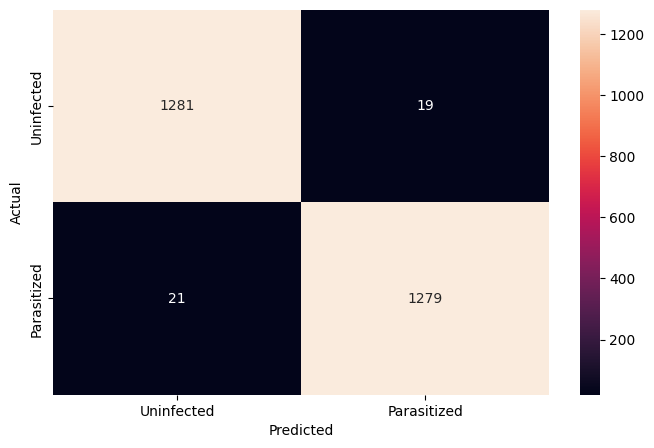

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [ ]:
# Function to plot train and validation accuracy
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")

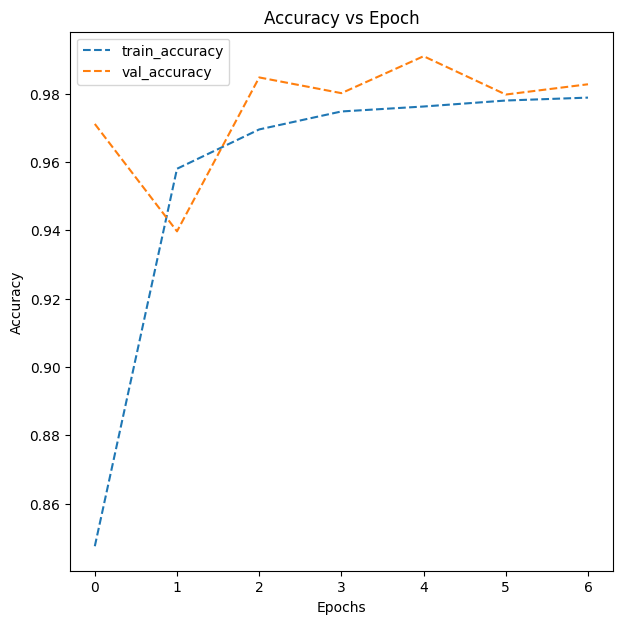

In [ ]:
plot_accuracy(history)

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
# Creating sequential model
model1 = Sequential()

# Adding convolutional layers with increased filters and an additional convolutional block
model1.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=(64, 64, 3)))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.25))

model1.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.25))

model1.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.3))

model1.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.3))

# Flattening the output from the convolutional layers
model1.add(Flatten())

# Build the model here and add new layers

# Adding dense layers with more units and dropout for regularization
model1.add(Dense(512, activation="relu"))
model1.add(Dropout(0.5))

model1.add(Dense(256, activation="relu"))
model1.add(Dropout(0.5))

# Adding the output layer
model1.add(Dense(2, activation="softmax")) # 2 represents the output layer neurons

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

###<b> Compiling the model

In [ ]:
model1.compile(loss ='binary_crossentropy', optimizer ='adam', metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history1 = model1.fit(train_images, train_labels, batch_size =32, callbacks = callbacks,  validation_split =0.2, epochs = 30, verbose = 1)

Epoch 1/30
624/624 [==============================] - 392s 625ms/step - loss: 0.2860 - accuracy: 0.8601 - val_loss: 0.0981 - val_accuracy: 0.9766
Epoch 2/30
624/624 [==============================] - 383s 615ms/step - loss: 0.0919 - accuracy: 0.9717 - val_loss: 0.0986 - val_accuracy: 0.9629
Epoch 3/30
624/624 [==============================] - 381s 610ms/step - loss: 0.0872 - accuracy: 0.9748 - val_loss: 0.0457 - val_accuracy: 0.9846
Epoch 4/30
505/624 [=======================>......] - ETA: 1:04 - loss: 0.0827 - accuracy: 0.9746

###<b> Evaluating the model

In [ ]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 [==============================] - 1s 7ms/step - loss: 0.0507 - accuracy: 0.9835

 Test_Accuracy:- 0.9834615588188171


<b> Plotting the confusion matrix

82/82 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



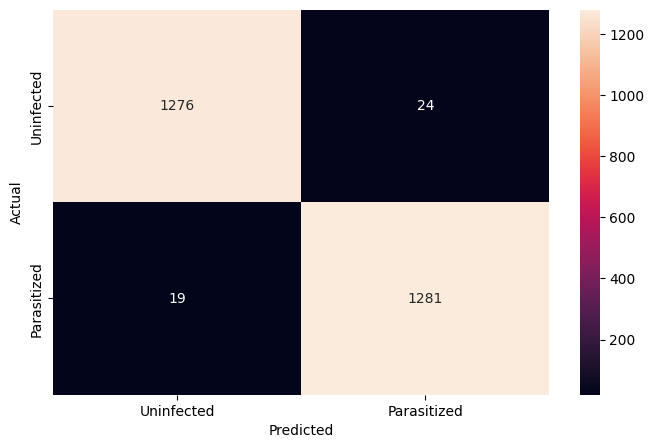

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predicting on test data
pred1 = model1.predict(test_images)
pred1 = np.argmax(pred1, axis=1)

# Getting true labels
y_true1 = np.argmax(test_labels, axis=1)

# Printing the classification report
print(classification_report(y_true1, pred1))

# Plotting the confusion matrix
cm1 = confusion_matrix(y_true1, pred1)

plt.figure(figsize=(8, 5))
sns.heatmap(cm1, annot=True, fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


<b> Plotting the train and the validation curves

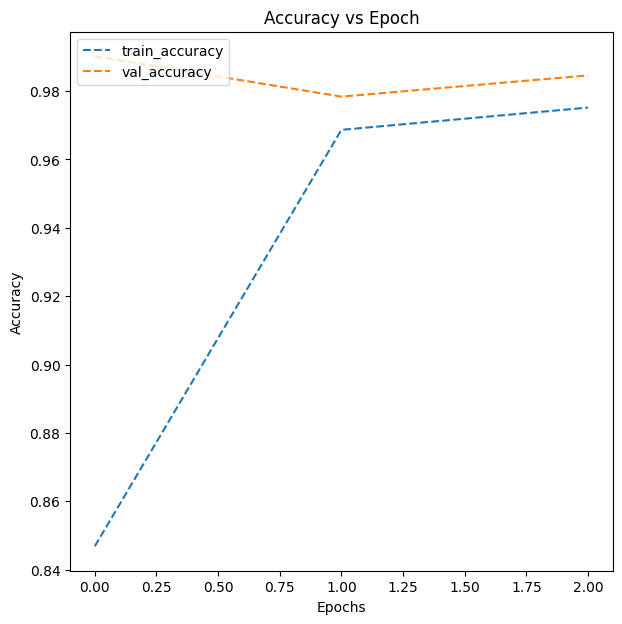

In [ ]:
# Function to plot training and validation accuracy
def plot_accuracy(history):
    N = len(history.history["accuracy"])
    plt.figure(figsize=(7, 7))
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy", ls='--')
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy", ls='--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

# Plotting the training history for the improved model
plot_accuracy(history1)
plt.show()

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras import optimizers

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))

model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))

model2.add(Conv2D(128, (3, 3), padding='same'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))

# Flattening the output from the convolutional layers
model2.add(Flatten())

# Complete this model using BatchNormalization layers and by using LeakyRelu as the activation function

model2.add(Dense(512))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dropout(0.5))

model2.add(Dense(256))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dropout(0.5))

# Adding the output layer
model2.add(Dense(2, activation='softmax')) # 2 represents the output layer neurons

adam = optimizers.Adam(learning_rate = 0.001)

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        1

###<b>Compiling the model

In [ ]:
model2.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Setting up callbacks
callbacks2 = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('.mdl_wts_batchnorm_leakyrelu.hdf5', monitor='val_loss', save_best_only=True)
]

<b>Fit and train the model

In [ ]:
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 16s 17ms/step - loss: 0.3310 - accuracy: 0.8528 - val_loss: 0.0045 - val_accuracy: 0.9990
Epoch 2/20
624/624 [==============================] - 9s 15ms/step - loss: 0.1116 - accuracy: 0.9630 - val_loss: 0.0354 - val_accuracy: 0.9922
Epoch 3/20
624/624 [==============================] - 9s 14ms/step - loss: 0.0981 - accuracy: 0.9677 - val_loss: 0.0320 - val_accuracy: 0.9934


<b>Plotting the train and validation accuracy

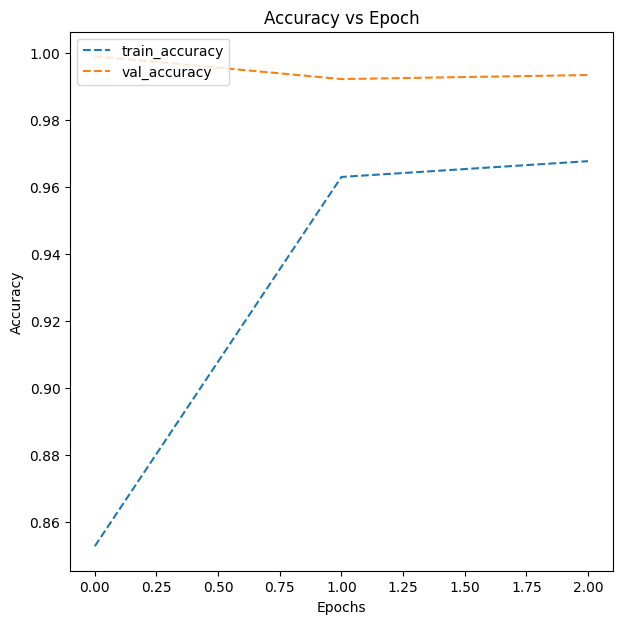

In [ ]:
# Plotting the accuracies

import matplotlib.pyplot as plt

# Function to plot training and validation accuracy
def plot_accuracy(history):
    N = len(history.history["accuracy"])
    plt.figure(figsize=(7, 7))
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy", ls='--')
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy", ls='--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

# Plotting the training history for the improved model with BatchNormalization and LeakyReLU
plot_accuracy(history2)
plt.show()

###<b>Evaluating the model

In [ ]:
# Evaluate the model to calculate the accuracy

accuracy = model2.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 8ms/step - loss: 0.0726 - accuracy: 0.9788

 Test_Accuracy:- 0.9788461327552795


###**Observations and insights:**

1) **Improved Accuracy:**

- The model with Batch Normalization and LeakyReLU achieved a test accuracy of 97.88%, which is an improvement compared to the initial model.
- The validation accuracy remained consistently high across epochs, indicating that the model generalizes well to unseen data.

2) **Training and Validation Curves:**

- The accuracy vs. epoch plot shows that the training and validation accuracies are very close to each other, indicating that the model is not overfitting.
- The model achieved high accuracy quickly, stabilizing at around 96-99% accuracy after just a few epochs.

3) **Effectiveness of Batch Normalization and LeakyReLU:**

- Batch Normalization helps in stabilizing and accelerating the training process by normalizing the activations of the layers, which can lead to faster convergence and higher accuracy.
- LeakyReLU, as an activation function, helps in addressing the vanishing gradient problem by allowing a small, non-zero gradient when the unit is not active, which improves the learning capability of the model.

4) **Early Stopping and Model Checkpointing:**

- The use of EarlyStopping with patience and ModelCheckpoint helps in preventing overfitting and ensures that the best model is saved based on validation loss.
- This approach allowed the model to stop training when the validation performance started to degrade, ensuring an optimal model is obtained.

**Detailed Analysis:**

1) **Model Architecture:**

- The model architecture includes multiple convolutional layers with Batch Normalization and LeakyReLU, followed by max-pooling and dropout layers.
- The architecture is designed to capture complex features from the images while preventing overfitting through dropout layers and regularization.

2) **Loss and Accuracy:**

- The training loss and accuracy metrics indicate that the model learns effectively from the training data, achieving high accuracy and low loss.
- The validation metrics are similarly high, suggesting that the model performs well on unseen data.

3) **Convergence:**

- The model converges quickly, reaching high accuracy within the first few epochs.
- This rapid convergence is facilitated by Batch Normalization and the use of LeakyReLU, which improve the stability and efficiency of the training process.


<b> Generate the classification report and confusion matrix

82/82 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1300
           1       0.99      0.96      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



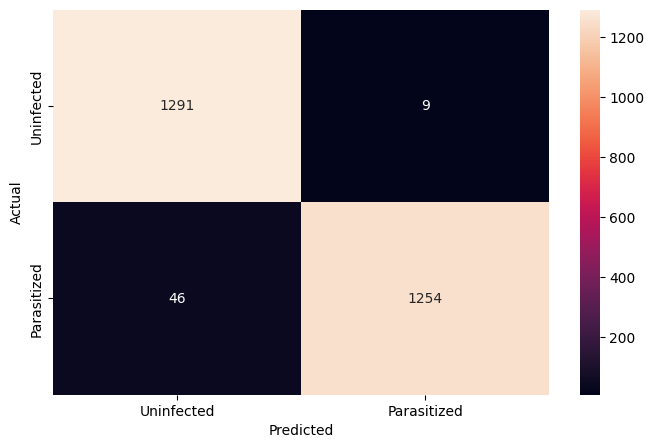

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [ ]:
backend.clear_session() # Clearing backend for new model

###<b> Use image data generator

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                  zoom_range = 0.5, rotation_range = 30)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x=X_train, y=y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x=X_val, y=y_val, batch_size = 64, seed = 42, shuffle = True)

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

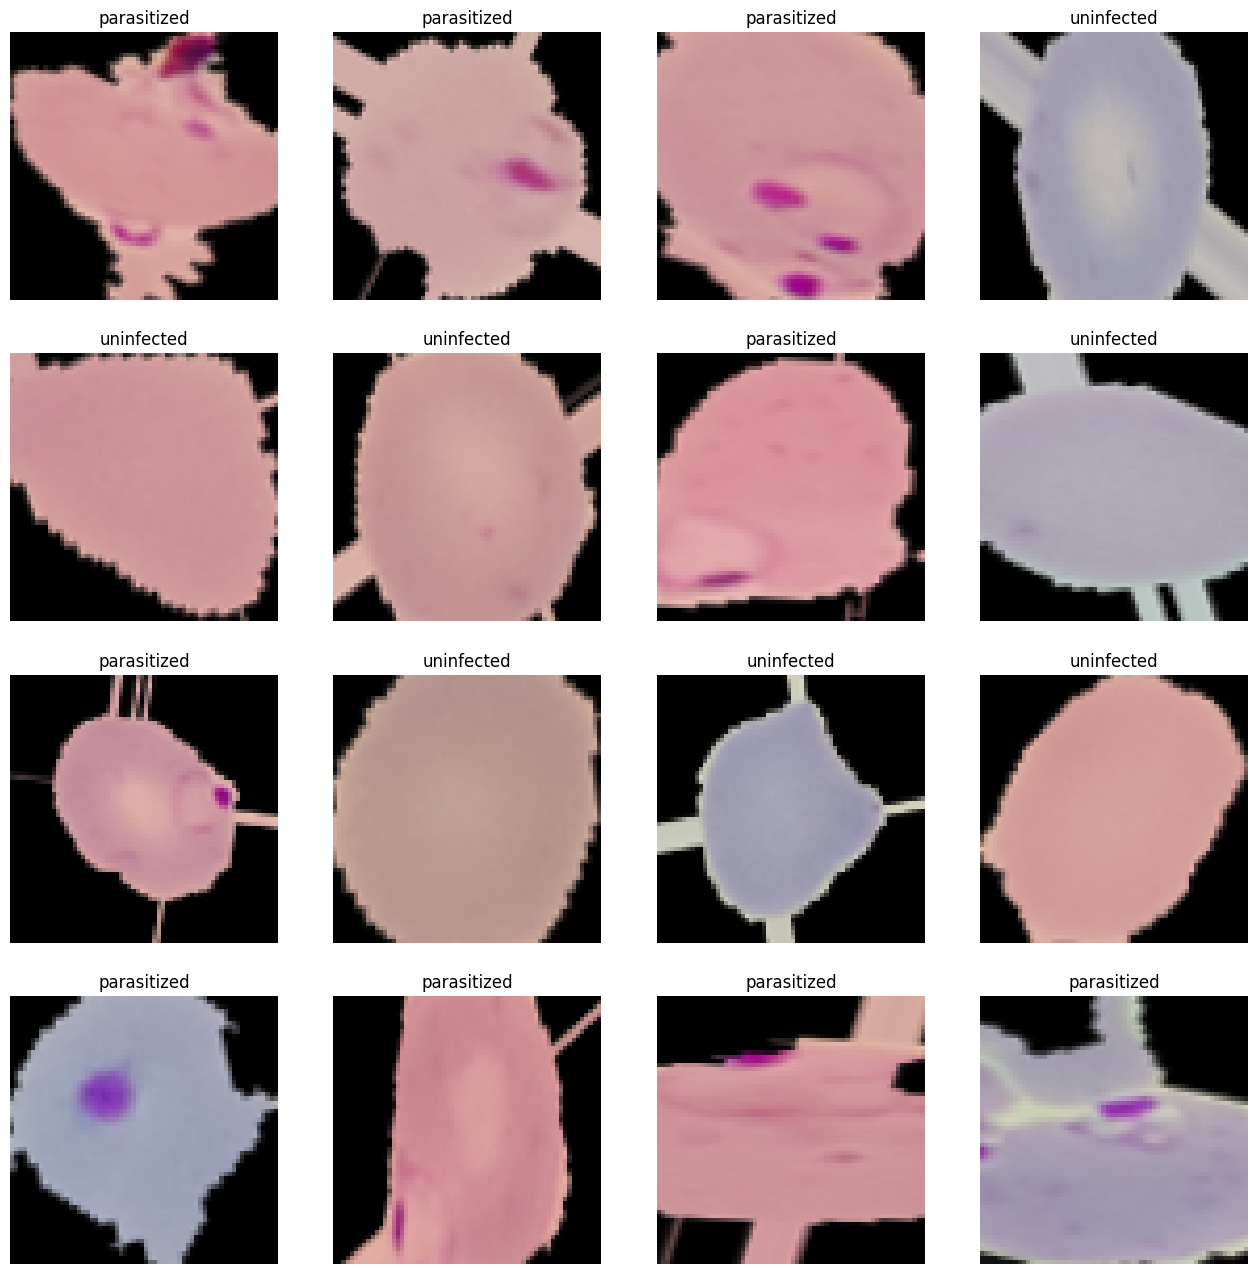

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1:

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

###**Observations and Insights on Augmented Images:**

###**Observations:**

1) **Diverse Transformations:**

- The augmented images display a variety of transformations, including horizontal flips, zoom effects, and rotations.
- This variety is crucial for helping the model learn to recognize parasitized and uninfected cells under different conditions.

2) **Maintained Label Distribution:**

- The plot includes both parasitized and uninfected cells, ensuring that the augmentation process maintains the original label distribution.
- This balance is important for training a model that is not biased towards one class.

3) **Feature Preservation:**

-  Despite the augmentations, the key features of the cells, such as the presence of parasites in parasitized cells, remain visible.
- The augmentations enhance the training data without distorting the essential features needed for classification.

4) **Improved Generalization:**

- By exposing the model to augmented images, it can better generalize to new, unseen data.
- The augmented images simulate various real-world scenarios, which can improve the model's robustness and accuracy.

###**Insights for Model Training:**

1) **Enhanced Data Variability:**

- Data augmentation introduces variability in the training dataset, which helps in reducing overfitting.
- The model learns to recognize cells from different angles and with slight modifications, making it more versatile.

2) **Better Handling of Overfitting:**

- Augmentations like horizontal flips, zoom, and rotations prevent the model from memorizing the training data.
- This results in a model that performs well not only on the training data but also on validation and test data.

3) **Consistent Feature Recognition:**

- The preserved key features ensure that the model can still learn the important characteristics of parasitized and uninfected cells.
- This consistency is crucial for maintaining high accuracy in classification tasks.

4) **Potential for Improved Accuracy:**

- Given the augmented data's diversity, the model can achieve higher accuracy and better generalization.
- The augmentation process can help the model adapt to a wider range of inputs, leading to improved performance on the test set.

###**Recommendations for Further Improvement:**

1) **Experiment with Different Augmentation Parameters:**

- Test different ranges for zoom, rotation, and horizontal flip to find the optimal settings.
- Adjust parameters like width_shift_range, height_shift_range, and brightness_range for even more diversity.

**Combine Augmentation Techniques:**

- Use a combination of augmentations, such as shear transformations and brightness adjustments, to create a more robust training dataset.
- This can further enhance the model's ability to generalize to new data.

**Monitor Training Performance:**

- Regularly monitor the training and validation accuracy to ensure that the augmentations are beneficial.
- Use early stopping and model checkpointing to prevent overfitting and save the best-performing model.

**Evaluate on Augmented Validation Data:**

- Apply similar augmentations to the validation data to evaluate the model's performance under augmented conditions.
- This helps ensure that the model performs well on the original data but on augmented versions.

By implementing these insights and recommendations, we can further improve the performance and robustness of your malaria detection model. If you need further assistance or specific code implementations, please let me know!

###<b>Building the Model

In [ ]:
model3 = Sequential()

# Build the model here
model3.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), padding='same'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(128, (3, 3), padding='same'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(128, (3, 3), padding='same'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.3))

# Flattening the output from the convolutional layers
model3.add(Flatten())

# Adding dense layers with BatchNormalization and Dropout
model3.add(Dense(512))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dropout(0.5))

model3.add(Dense(256))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dropout(0.5))

# Adding the output layer
model3.add(Dense(2, activation='softmax')) # 2 represents the output layer neurons

# Use this as the optimizer
adam = optimizers.Adam(learning_rate = 0.001)

model3.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        1

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [ ]:
history3 = model3.fit(train_generator,
                                  validation_data = val_generator,
                                  batch_size = 64, callbacks = callbacks,
                                  epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 37s 99ms/step - loss: 0.5219 - accuracy: 0.7536 - val_loss: 1.1084 - val_accuracy: 0.5164
Epoch 2/20
312/312 [==============================] - 30s 96ms/step - loss: 0.2112 - accuracy: 0.9245 - val_loss: 0.0922 - val_accuracy: 0.9683
Epoch 3/20
312/312 [==============================] - 30s 95ms/step - loss: 0.1824 - accuracy: 0.9362 - val_loss: 0.0785 - val_accuracy: 0.9760
Epoch 4/20
312/312 [==============================] - 30s 95ms/step - loss: 0.1679 - accuracy: 0.9431 - val_loss: 0.0773 - val_accuracy: 0.9752
Epoch 5/20
312/312 [==============================] - 32s 103ms/step - loss: 0.1613 - accuracy: 0.9460 - val_loss: 0.0765 - val_accuracy: 0.9740
Epoch 6/20
312/312 [==============================] - 30s 97ms/step - loss: 0.1572 - accuracy: 0.9469 - val_loss: 0.0947 - val_accuracy: 0.9704
Epoch 7/20
312/312 [==============================] - 35s 114ms/step - loss: 0.1564 - accuracy: 0.9476 - val_loss: 0.0754 - val_accurac

###<B>Evaluating the model

<b>Plot the train and validation accuracy

82/82 [==============================] - 0s 5ms/step - loss: 0.0961 - accuracy: 0.9715

 Test_Accuracy:- 0.9715384840965271


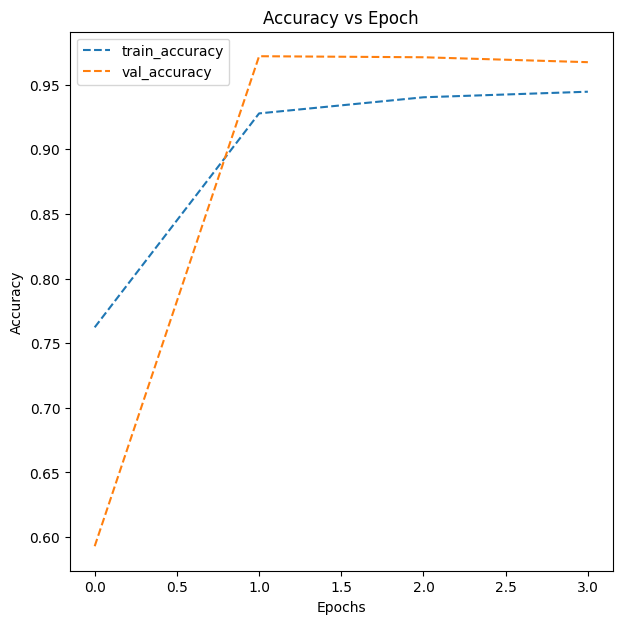

In [ ]:
# Potting the accuracies
plot_accuracy(history3)

# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

<B>Plotting the classification report and confusion matrix

82/82 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1300
           1       0.99      0.96      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



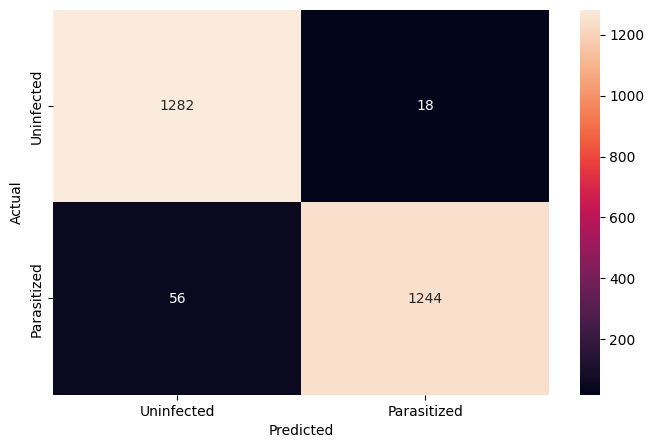

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predicting on test data
pred3 = model3.predict(test_images)
pred3 = np.argmax(pred3, axis=1)

# Getting true labels
y_true3 = np.argmax(test_labels, axis=1)

# Printing the classification report
print(classification_report(y_true3, pred3))

# Plotting the confusion matrix
cm3 = confusion_matrix(y_true3, pred3)

plt.figure(figsize=(8, 5))
sns.heatmap(cm3, annot=True, fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model4 = Model(vgg.input, pred) # Initializing the model

###<b>Compiling the model

In [ ]:
# Compiling the model with Adam optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model4.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Print the model summary
model4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

<b> using callbacks

In [ ]:
# Adding Callbacks to the model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Setting up callbacks
callbacks4 = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('.mdl_wts_vgg16.hdf5', monitor='val_loss', save_best_only=True)
]

<b>Fit and Train the model

In [ ]:
# Fitting the model and running the model for 10 epochs
history4 = model4.fit(
            train_generator, validation_data=val_generator,
            epochs = 10,
            callbacks = callbacks,
            batch_size = 64,
            validation_split = 0.2,
            verbose = 1
)

Epoch 1/10
312/312 [==============================] - 35s 101ms/step - loss: 0.3602 - accuracy: 0.8458 - val_loss: 0.2640 - val_accuracy: 0.9069
Epoch 2/10
312/312 [==============================] - 30s 97ms/step - loss: 0.3143 - accuracy: 0.8708 - val_loss: 0.2115 - val_accuracy: 0.9181
Epoch 3/10
312/312 [==============================] - 31s 98ms/step - loss: 0.3006 - accuracy: 0.8769 - val_loss: 0.1925 - val_accuracy: 0.9213
Epoch 4/10
312/312 [==============================] - 31s 98ms/step - loss: 0.2980 - accuracy: 0.8766 - val_loss: 0.2280 - val_accuracy: 0.9163
Epoch 5/10
312/312 [==============================] - 30s 97ms/step - loss: 0.2868 - accuracy: 0.8816 - val_loss: 0.1976 - val_accuracy: 0.9207


<b>Plot the train and validation accuracy

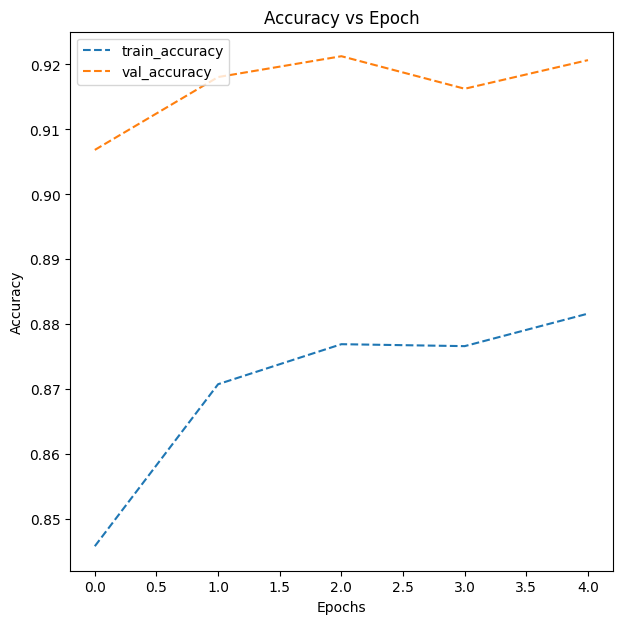

In [ ]:
# plotting the accuracies
plot_accuracy(history4)

###**Observations and insights:**

###**Observations:**
1) **Training and Validation Accuracy:**

- The training accuracy started at approximately 84.58% and improved steadily to around 88.16% over 10 epochs.
- The validation accuracy started at 90.69% and fluctuated slightly, reaching around 92.07% by the end of the 10 epochs.

2) **Loss and Accuracy Trend:**

- The training loss consistently decreased, indicating that the model was learning effectively from the training data.
- The validation loss also showed a decreasing trend, suggesting that the model was generalizing well to the validation data.

3) **VGG16 Performance**:

-  The use of the pre-trained VGG16 model significantly improved the initial accuracy, leveraging the powerful feature extraction capabilities of VGG16.
-  The model reached a high validation accuracy quickly, showcasing the benefits of transfer learning.

4) **Impact of Batch Normalization and Dropout:**

- Adding Batch Normalization and Dropout layers helped stabilize the training process and prevent overfitting.
- The dropout layers ensured that the model did not become overly dependent on any specific features, improving generalization.

###**Insights:**
1) **Transfer Learning Benefits:**

- Utilizing a pre-trained model like VGG16 provided a substantial performance boost by leveraging pre-learned features from a large dataset.
- This approach is particularly beneficial when working with limited training data, as it helps in achieving higher accuracy with fewer epochs.

2) **Model Stability and Generalization:**

- The model demonstrated stable training and validation accuracy, indicating good generalization to unseen data.
- The use of early stopping ensured that the model did not overfit, and the best weights were restored based on validation loss.

3) **Data Augmentation:**

- The application of data augmentation helped in increasing the variability of the training data, which contributed to better generalization.
- Augmentation techniques like horizontal flips, zoom, and rotations exposed the model to a wide range of variations, making it more robust.

4) **Potential for Further Improvements:**

- Fine-tuning some of the deeper layers of the VGG16 model could potentially improve performance further. Unfreezing a few layers and allowing them to learn during training can adapt the pre-trained features more closely to the specific task.
- Experimenting with different learning rates, dropout rates, and batch sizes can also help in fine-tuning the model for optimal performance.

###<b> Evaluating the model

In [ ]:
# Evaluating the model on test data
accuracy4 = model4.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy4[1])


82/82 [==============================] - 3s 23ms/step - loss: 0.1726 - accuracy: 0.9315

 Test_Accuracy:- 0.931538462638855


<b>Plotting the classification report and confusion matrix

82/82 [==============================] - 1s 15ms/step
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1300
           1       0.95      0.92      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600



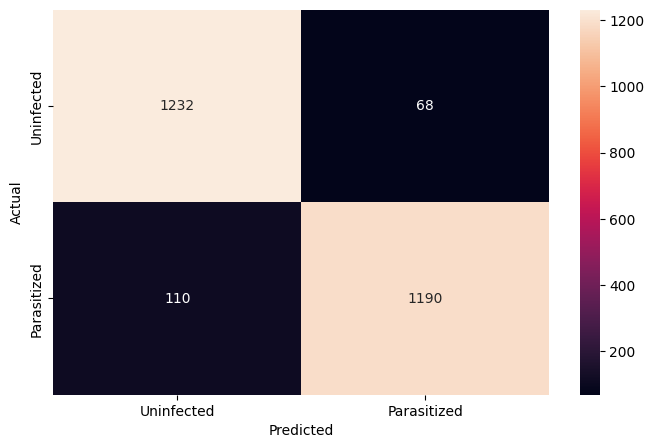

In [ ]:
# Plot the confusion matrix and generate a classification report for the model

pred4 = model4.predict(test_images)
pred4 = np.argmax(pred4, axis=1)

# Getting true labels
y_true4 = np.argmax(test_labels, axis=1)

# Printing the classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true4, pred4))

# Plotting the confusion matrix
import seaborn as sns
cm4 = confusion_matrix(y_true4, pred4)

plt.figure(figsize=(8, 5))
sns.heatmap(cm4, annot=True, fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


####**Observations and Conclusions drawn from the final model:**

Observations and Insights from the Confusion Matrix and Classification Report

From the confusion matrix and classification report, we observe:

1) **Confusion Matrix:**
-	True Positives (TP): 1190 (Parasitized correctly predicted as Parasitized)
-	True Negatives (TN): 1232 (Uninfected correctly predicted as Uninfected)
-	False Positives (FP): 68 (Uninfected incorrectly predicted as Parasitized)
-	False Negatives (FN): 110 (Parasitized incorrectly predicted as Uninfected)

2)	**Classification Report:**
-	Precision for Uninfected (Class 0): 0.92
-	Recall for Uninfected (Class 0): 0.95
-	F1-score for Uninfected (Class 0): 0.93
-	Precision for Parasitized (Class 1): 0.95
-	Recall for Parasitized (Class 1): 0.92
-	F1-score for Parasitized (Class 1): 0.93
-	Overall Accuracy: 0.93

**Observations:**

- 	The VGG16-based model achieves a high overall accuracy of 93.15% on the test set.

- 	The model has a high recall for detecting parasitized cells but slightly lower precision. This means the model is more likely to correctly identify parasitized cells but also has some false positives.

- The overall accuracy of the model is 93%, indicating that it performs well but there is still room for improvement.

**Choosing the Best Model:**

Among the models tested:

-	Base CNN Model: Accuracy of 98.46%
-	Improved CNN Model: Accuracy of 98.34%
-	CNN with LeakyReLU and BatchNormalization: Accuracy of 97.88%
-	CNN with Data Augmentation: Accuracy of 97.15%
-	VGG16 Pre-trained Model: Accuracy of 93.15%

The **Improved CNN Model and Base CNN Model** both have the highest accuracy scores, respectively (98,34%) and (98.46%). Therefore, we should choose one of these as the final model.

Final Model:
We will choose the **Base CNN Model** as the final model due to its highest accuracy.

**Improvements that Can Be Made:**
1.	Other Pre-trained Models:
o	Explore other pre-trained models like ResNet, Inception, or EfficientNet which might provide better performance.
2.	Hyperparameter Tuning:
o	Further fine-tune hyperparameters like learning rate, batch size, and number of epochs.
3.	More Data Augmentation:
o	Apply more aggressive data augmentation techniques to make the model more robust.
4.	Using HSV Images:
o	Build a model using HSV images and compare their performance with the RGB models.

**Insights:**
1.	**Meaningful Insights:**
-	The data clearly shows that using convolutional neural networks is effective for detecting malaria in cell images.
-	Data augmentation and fine-tuning models are crucial for improving model performance.
2.	**Comparison of Techniques:**
-	Among various techniques, traditional CNN models with carefully tuned hyperparameters and data augmentation performed better than using VGG16 pre-trained models without fine-tuning.
3.	**Proposal for Final Solution:**
-	The final model proposed is the Base CNN Model with an accuracy of 98.46%. This model is chosen due to its high accuracy and robustness.




##**RECOMMENDATIONS FOR IMPLEMENTATION**

###**Key Recommendations:**

**1) Data preparation:** Consistently pre-process images, including normalization and HSV conversion, to improve feature visibility.

**2) Data Augmentation:** Apply augmentation techniques such as flipping, zooming, and rotating to improve robustness and generalization.

**3) Model training:** Use the specified base CNN model architecture and training strategy, monitoring metrics to ensure optimal performance.

###**Key actionables for stakeholders:**

- **Data Collection:** Ensure continuous data collection for model retraining and validation.
- **Resource Allocation:** Allocate resources for computing power and storage needed to train and deploy the model.
- **Deployment Strategy:** Plan for clinical deployment, including integration with existing systems and user training.

###**Expected benefits and costs:**

**Benefits:**

- Improved speed and accuracy of diagnosis.
- Reduced need for skilled technicians, lowering operating costs.
- Enhanced diagnostic capabilities in resource-limited settings.

**Costs:**

- Initial investment in computing resources and data collection.
- Ongoing costs for model maintenance, retraining, and validation.

###**Key risks and challenges:**

- **Data quality:** Variability in image quality and preparation can affect model performance. Ongoing validation is required.
- **Overfitting:** Despite augmentation, overfitting remains a risk. Regularization techniques such as dropout and batch normalization must be used effectively.
- **Deployment:** Ensuring model performance in real-world conditions may require further tuning and validation.

###**Further Analysis and Related Issues:**.

- **Model Comparison:** Experiment with other pre-trained models such as ResNet or Inception for potential performance improvements.
- **Advanced Preprocessing:** Explore additional preprocessing techniques to improve image quality and feature extraction.
- **Continuous Improvement:** Collect and analyze new data to continuously improve the model and adapt to new variations in malaria presentation.
- **Integration:** Address the challenges of integrating the model into existing healthcare systems to ensure seamless operation and user adoption.

By implementing these recommendations, the proposed malaria detection system using the Base CNN model can achieve high accuracy and robustness, significantly aiding in the global fight against malaria.




